**Group Members**:
- Afonso Cadete | 20211519@novaims.unl.pt
- Catarina Oliveira | 20211616@novaims.unl.pt
- Joana Rosa | 20211516@novaims.unl.pt
- Rita Centeno | 20211579@novaims.unl.pt

# 2. Jupyter Notebook - Preprocess
# Data Pre-processing

In this Jupyter Notebook, the previously combined dataframe is analysed and treated in regard to:
- data inconsistencies;
- missing values;
- outliers.

A brief description of the dataset structure is also presented.

Importation of needed libraries for the pre-processing of the variables of the dataset.

In [1]:
# Libraries Importation
import numpy as np
import pandas as pd
# conda install sklearn
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer

## Opening the data

The combined dataset (exported at the end of the first Jupyter Notebook - Combine) has to be imported into this new jupyter notebook in order for the description of the dataset and feature treatment and transformation to be applied.

In [2]:
# Importation of the Combined Dataset

# This path should be changed into the path where the Excel document "1Combine" was stored.
path = 'C:\\Users\\joana\\Documents\\Joana Rita\\Universidade\\Data Science\\Year 2\\1st Semester\\Programming for Data Science\\1st Project\\'
# Read the Excel document and define that the 'ID' column is the index of the dataset
data_original = pd.read_excel(path + '1Combine.xlsx', index_col = 'ID')
# Creating a copy of the imported data, so that the original one is never changed
data = data_original.copy()

# Calling the head of the dataset, to ensure the import was correctly done.
data.head()

,CostContact,Revenue,BirthYear,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5314,3,11,1951.0,Graduation,Together,0.0,1.0,40689.0,270,3,...,7,1,5,8,0,0,0,0,0,0
2493,3,11,1966.0,Graduation,Married,0.0,1.0,61286.0,356,0,...,7,1,8,5,0,0,0,0,0,0
4931,3,11,1977.0,Graduation,Together,0.0,0.0,157146.0,1,0,...,0,28,0,1,0,0,0,0,0,0
1100,3,11,1960.0,Master,Together,1.0,2.0,41275.0,24,4,...,3,1,3,5,0,0,0,0,0,0
7224,3,11,1977.0,Graduation,Married,NaN,NaN,31353.0,10,0,...,1,1,2,8,0,0,0,0,0,0


As all variables and their respective values, show in the above head of the data dataframe, are the same as the ones from the previous Jupyter Notebook (1. Combine) it is possible to conclude that the dataset was rightfully imported into this new notebook.

## Description of the Dataset

In this sub-part of the project, the description of the dataset will be performed in terms of:
- analysis of which variables have missing values;
- description of the variable types that exist in the dataset;
- analysis of the descriptive statistics of the variables of the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5314 to 10478
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CostContact        2240 non-null   int64  
 1   Revenue            2240 non-null   int64  
 2   BirthYear          2218 non-null   float64
 3   Education          2209 non-null   object 
 4   MaritalStatus      2240 non-null   object 
 5   NKids              2212 non-null   float64
 6   NTeens             2212 non-null   float64
 7   Income             2189 non-null   float64
 8   MntWines           2240 non-null   int64  
 9   MntFruits          2240 non-null   int64  
 10  MntMeatProducts    2240 non-null   int64  
 11  MntFishProducts    2240 non-null   int64  
 12  MntSweetProducts   2240 non-null   int64  
 13  MntGoldProds       2240 non-null   int64  
 14  CustomerFrom       2240 non-null   object 
 15  Complain           2240 non-null   int64  
 16  Recency            2

From the above information on the variables of the dataset it is possible to conclude that `BirthYear`, `Education`, `Nkids`, `Nteens` and `Income` have 22, 31, 28, 28 and 51 missing values, respectively. Further on in this document all missing values will be treated.

Additionally, it can also be stated that, in this dataset, there are only three types of variables: object, int64 and float 64.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CostContact,2240.0,3.000000,0.000000e+00,3.0,3.00,3.0,3.00,3.0
Revenue,2240.0,11.000000,0.000000e+00,11.0,11.00,11.0,11.00,11.0
BirthYear,2218.0,1968.768711,1.198568e+01,1893.0,1959.00,1970.0,1977.00,1996.0
NKids,2212.0,0.444394,5.389239e-01,0.0,0.00,0.0,1.00,2.0
NTeens,2212.0,0.507685,5.433989e-01,0.0,0.00,0.0,1.00,2.0
Income,2189.0,97943.443582,2.136389e+06,1730.0,35340.00,51412.0,68655.00,99999999.0
MntWines,2240.0,303.935714,3.365974e+02,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,3.977343e+01,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,2.257154e+02,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,5.462898e+01,0.0,3.00,12.0,50.00,259.0


On the table above the descriptive statistics of all variables of the dataset were computed (count of values, mean, standard deviation, minimum value, 1st, 2nd and 3rd quartile, as well as the maximum values of the features).

The first two variables of the dataset are `CostContact` and `Revenue`. In these, it is possible to check a null standard deviation (std = 0), which indicates that these features are constants, in the sense that they have the same value for all ID's of the dataset. In context, this can be justified by the fact that each cost of contact is three monetary units and the revenue if each client buys a campaign is 11 monetary units.

Moving on to `BirthYear`,  since the value of the mean does not differ a lot from the one of the median, this seems to be an approximately normally distributed variable.
However, due to the fact that there is at least a customer born in 1893 (123 years old) - which is almost humanly impossible (nobody lives that long), there is still the possibility for the existence of outliers in this feature.

In terms of the `Income` feature, since the customers contacted may come from many backgrounds it is possible that they do earn more or less than each other. This can also explain the extremely large value of standard deviation, as well as the great difference between the value of the third and the fourth quartile of this variable. However, it is still very unlikely that someone is able to receive in a year worth of pay's 99999999.0 monetary units. Therefore, the existence of outliers in this variable is still not totally disregarded.

One common characteristic to all monetary related features is that their values of mean and median are very distinct from each other. Therefore, indicating that these variables do not follow normal distributions. Given that all of them also have values for the third and fourth quartile that are very apart from each other and that the standard deviations are also high, it can be said that these variables have a high variability of the data (data is very varied). Furthermore, outliers do exist in most of these variables. In context, this can be explained by the fact that some customers prefers some products over others and therefore buy different quantities of each.

`Recency` is the variable of the dataset that indicates the number of days since the customer last made a purchase in the company. As so, and by analysing the descriptive statistics, it is possible to conclude that this seems to be an approximately normally distributed variable. It also has a reasonable value of the standard deviation, which gives away that there is not much dispersion of the data (most of the customers made their last purchases on dates relatively close to each other).

Finally, almost all purchase features (`NDealsPurchases`, `NCatalogPurchases`, `NStorePurchases`, `NWebPurchases`, `NWebPurchases`) and the feature `NWebVisitsMonth` have akin characteristics. These are:
- similar values for the mean and median;
- do not have a large value of standard deviation;
- acceptable values of minimum and maximum of variables (there was no customer which made like 1000 type of purchases);
- slight difference from the values of the third to the ones of the fourth quartile.

Additionally, it is important to mention that the above descriptive statistics do not give us relevant information on the binary variables of the dataset (`NKids`, `NTeens`, `Complain`, `Response1`, `Response2`, `Response3`, `Response4`, `Response5`, `Response`), since only the maximum and the minimum values can be taken into account, 0 and 1 , respectively.


### Approximately Normally Distributed Variables Analysis

#### Boxplots

According to [__Oxford Languages__](https://languages.oup.com/google-dictionary-en/) a boxplot, also denominated as box and whisker plot, is "a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle ".

From the above analysis of the descriptive statistics of the variables, we considered some variables as being approximately normally distributed. As so, we will now verify if that is actually true or not. Meanwhile, trying to always confirm the existence of outliers in such variables.

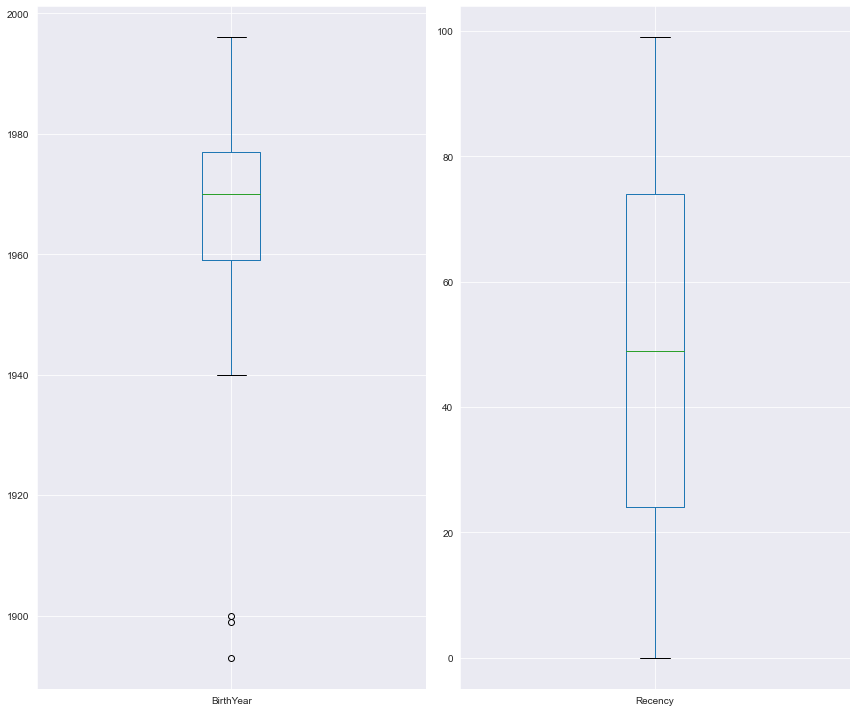

In [5]:
fs = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
     'MntGoldProds', 'NDealsPurchases', 'NWebPurchases', 'NCatalogPurchases', 'NStorePurchases','NWebVisitsMonth']

fs_new = ['BirthYear', 'Recency']

nrows, ncols = 1,2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
fig.subplots_adjust(wspace=0.35, hspace=0.25)

for i, f in enumerate(fs_new):
    data.boxplot(f, ax=axes.flatten()[i])

plt.tight_layout()

From the boxplots that were just computed it can be said that for the `BirthYear` feature does indeed show points that are far away from the minimum value of the variable. Which means that these points possibly be outliers of the dataset. The point that is further away from the minimum value is someone who was born before 1900, which is most likely the one client, already mentioned before, which was born in 1893 (123 years old). Therefore, confirming our hypothesis.

As for the `Recency` variable, it apparently shows no outliers and it is possible to verify that it is pretty normally distributed.

#### Histograms

According to Cambridge Dictionary, [__Histograms__](https://dictionary.cambridge.org/dictionary/english/histogram) are "a mathematical picture that uses vertical columns of different heights to show ranges of weight, height, time, etc. or frequencies (= how many times something happens)."

In the next cells, histograms for all continuous variables which were not defined as being normally distributed will be computed.

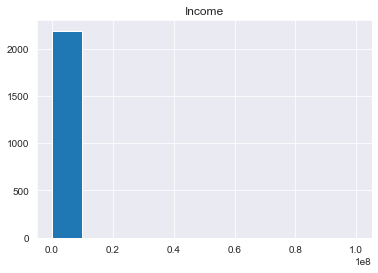

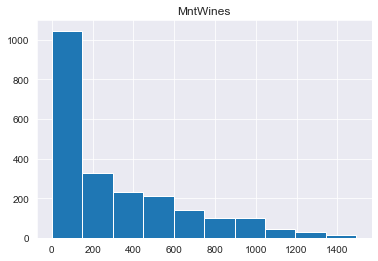

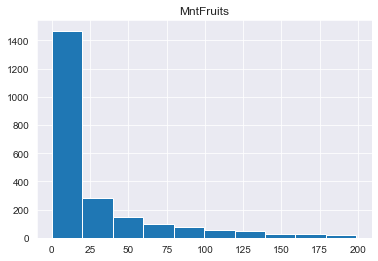

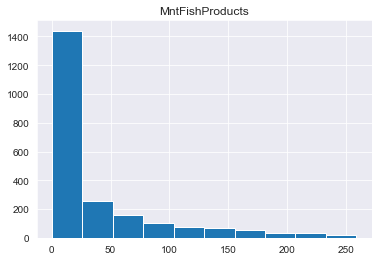

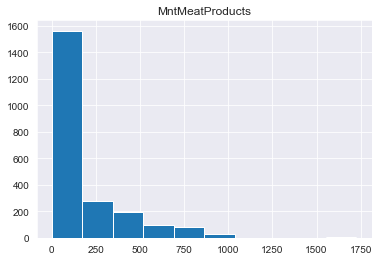

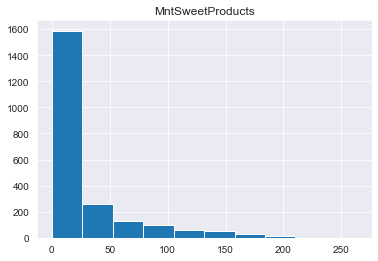

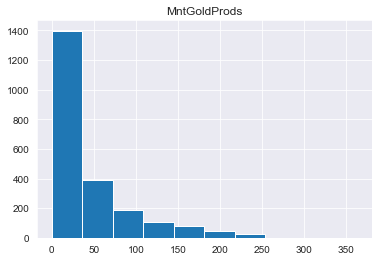

In [6]:
hist_var = ['Income', 'MntWines', 'MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']

for var in hist_var:
    plt.title(var)
    plt.hist(data[var])
    plt.show()

From the just computed histograms it was possible to conclude all analysed variables by the histograms, except `Income`, show extremely right-skewed distributions (that can be fixed by logarithmic transformations).

Additionally, the variable `Income` only shows one peak in it's above computed histogram. As so and in order to verify this hypothesis, in the next few cells the outliers of this feature were analyzed and removed in a separate variable (so to not alter all the dataset).

In [7]:
# checks for the existence of outliers
data[data['Income'] > 200000]

,CostContact,Revenue,BirthYear,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
9432,3,11,1977.0,Graduation,Together,1.0,0.0,666666.0,9,14,...,3,1,3,6,0,0,0,0,0,0
9135,3,11,1950.0,SchoolOfLife,Together,1.0,1.0,99999999.0,13,2,...,1,1,2,8,0,0,0,0,0,0


In [8]:
# removes the outliers found in the above cell
data_wo_out_income = data.drop([9135, 9432])

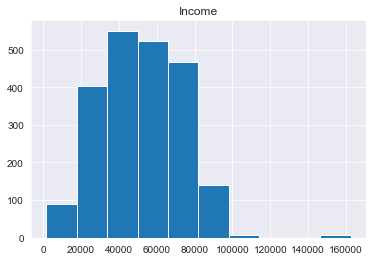

In [9]:
# plots the histogram of Income with using the variable which contains the data without outliers
plt.title('Income')
plt.hist(data_wo_out_income['Income'])
plt.show()

After seeing the difference between the two plots for the `Income` variable it is possible to state that, without the outliers, this feature is approximately normally distributed (while being slightly right-skewed). Thus, the influence of outliers, in the variables in consequent statistical methods results, is verified.

As there would still be left some discrete non-normally distributed variables of the dataset, the barcharts presented below were computed.

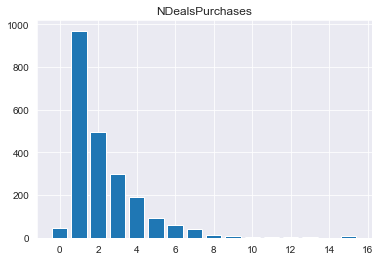

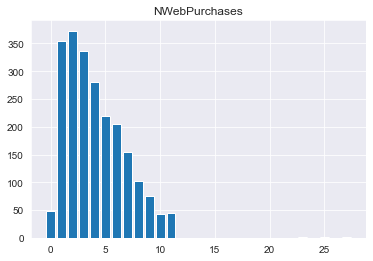

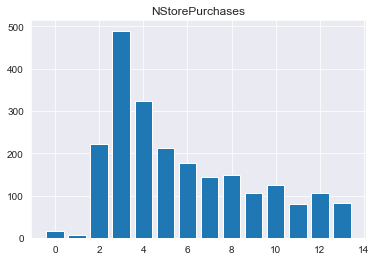

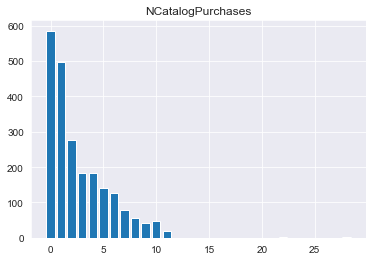

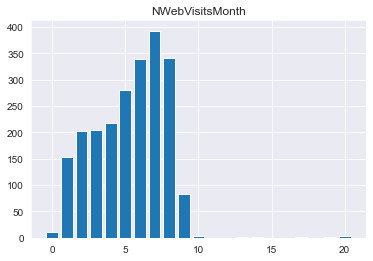

In [10]:
bar_var = ['NDealsPurchases', 'NWebPurchases', 'NStorePurchases', 'NCatalogPurchases', 'NWebVisitsMonth']

for var in bar_var:
    plt.title(var)
    plt.bar(data[var].value_counts().index, data[var].value_counts().values)
    plt.show()

From the brief analysis of the bar charts shown above, it is possible to check that all variables, except `NVisitsMonth` have right-skewed distributions.
This is due to the fact that `NWebVisitsMonth` reveals a slight left-skewed distribution (which can be fixed with a square-root transformation).

#### Pie Charts for Categorical and Binary Variables

As binary variables could not be analysed through the descriptive statistics of the method .describe() the following pie charts were computed in order to give a visual representation of the distribution of each categorical variable of the dataset.

<AxesSubplot:ylabel='NKids'>

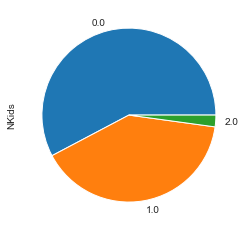

In [11]:
data['NKids'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='NTeens'>

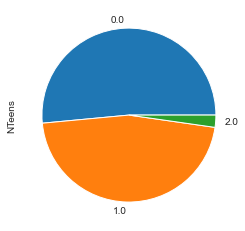

In [12]:
data['NTeens'].value_counts().plot(kind='pie')

`NKids` and `NTeens` have similar distributions of its values and both only have the values 0, 1 and 2. Therefore, the maximum number of kids in a household is two and the same happens for the greatest value of teens in a household.

<AxesSubplot:ylabel='Complain'>

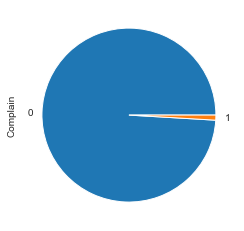

In [13]:
data['Complain'].value_counts().plot(kind='pie')

Most of the customers of the dataset did not fill in complains on the company. As so, it can be said that the company offers a good customer-service and is an effective enterprise.
Given that the number of customer who did fill a complaint is very low compared to the ones who were satisfied, this might cause analysis problems further on, making this a possibly less relevant feature for the prediction of `Response`.

<AxesSubplot:ylabel='Response1'>

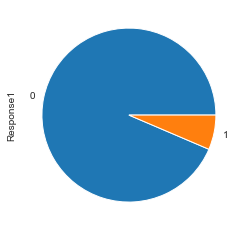

In [14]:
data['Response1'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Response2'>

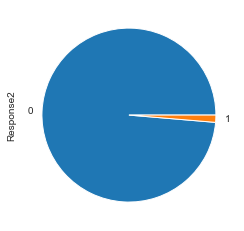

In [15]:
data['Response2'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Response3'>

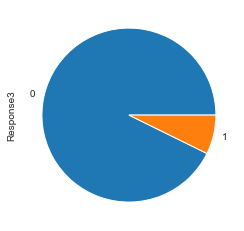

In [16]:
data['Response3'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Response4'>

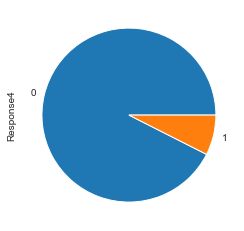

In [17]:
data['Response4'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Response5'>

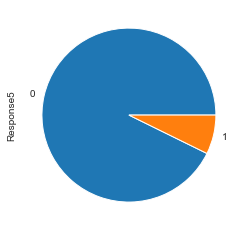

In [18]:
data['Response5'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Response'>

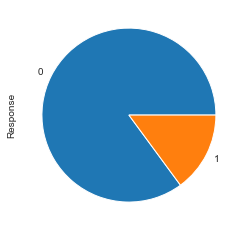

In [19]:
data['Response'].value_counts().plot(kind='pie')

From the response feature piecharts it is intuitively possible to conclude that the worst marketing campaign was the second one, since the slice of the pie that represents the people who bought the offer is almost null.
In contrast, all the other campaign (without counting with the target campaign - `Response`) have similar sizes of the slice that identifies those who bought the campaigned products.

## Feature Transformation

In **feature transformation**, already existing variables of the dataset were transformed. Some altered variables are:
- `BirthYear` was transformed into `Age`;
- `Marital Status` classes were updated (had values that did not make sense in the context);
- some classes from the variable `Education` were deleted since they did not make sense;
- `CustomerFrom` was transformed from a string date into the number of days since the first purchase of that specific customer - `Longevity`.

#### BirthYear

For a matter of simplicity the column `BirthYear` was renamed and transformed into `Age`. This new variable comprises the age of the client at the present year of analysis (2016) - difference between the considered year of the dataset, 2016, and the value of the `BirthYear`.

In [20]:
# Renaming of the BirthYear variable to Age
data.rename({'BirthYear': 'Age'}, axis = 1, inplace = True)
# Creation of the Age values for the renamed variable
data['Age'] = 2016 - data['Age']

#### MaritalStatus

After a brief analysis of the combined dataset it was possible to check that the feature `MaritalStatus` had values that did not make sense, such as:
- YOLO;
- Absurd;
- Alone (since there were only 3 customers with such value it was decided that Alone = Single).

In [21]:
# Prints the classes of MaritalStatus and the number of values for each class
print(data['MaritalStatus'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: MaritalStatus, dtype: int64


One possible explanation for the occurrence of these values is that the customers contacted did not take the marketing campaign questions seriously. Therefore, giving answers completely out of context.

Hence, in order to keep the reliability of the data, these 4 rows of values (2 for 'YOLO' and 2 for 'Absurd') were dropped from the dataset.
In regard to, the three observations with the answer 'Alone', for a matter of simplicity, these were considered as people who were 'Single' at the moment of the phone call.

In [22]:
# Replacement of values equal to Alone, in the `MaritalStatus` variable, for Single
data['MaritalStatus'] = data['MaritalStatus'].replace('Alone', 'Single')

In [23]:
# Drops the values, in the `MaritalStatus` variable, equal to YOLO
data.drop(data[data['MaritalStatus'] == 'YOLO'].index, axis = 0, inplace = True)
# Drops the values, in the `MaritalStatus` variable, equal to Absurd
data.drop(data[data['MaritalStatus'] == 'Absurd'].index, axis = 0, inplace = True)

In order to verify if the above transformation were done correctly, the below cell was computed to print, once again, all the values of the classes of `MaritalStatus`.

In [24]:
# Prints the classes of MaritalStatus and the number of values for each class
print(data['MaritalStatus'].value_counts())

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: MaritalStatus, dtype: int64


As it can be seen, the classes Alone, YOLO and Absurd do not exist anymore. Therefore, the transformations were successfully applied.

#### Education

Akin to `MaritalStatus`, the `Education` feature also has a class that does not make sense (School of Life). As so, that customer will be dropped out of the dataset, in order to keep the reliability of the dataset.

In [25]:
# Prints the classes of Education and the number of values for each class
print(data['Education'].value_counts())

Graduation      1106
PhD              478
Master           366
2n Cycle         200
Basic             54
SchoolOfLife       1
Name: Education, dtype: int64


Since 2n Cycle class name might be a confusing name, because in Portugal High School is named 'Secundário', for a simplicity of further analysis of the dataset, the values of variable `Education` equal to 2n Cycle were replaced by High School.

In [26]:
# Replacement of values equal to 2n Cycle, in the `Education` variable, for High School
data['Education'] = data['Education'].replace('2n Cycle', 'High School')

Upon further examination of the above values, the following description illustrates the interpretation of each of the values of the 'Education' variable.
- Graduation: People who have finished a Bachelor's degree;
- PhD: People who successfully completed a doctorates degree/program;
- Master: People who concluded a Master's degree;
- High School: People who finished High School;
- Basic: People who finished 9th grade.

In [27]:
# Drops the value, in the `Education` variable, equal to SchoolOfLife
data.drop(data[data['Education'] == 'SchoolOfLife'].index, axis = 0, inplace = True)

In [28]:
# Prints the classes of Education and the number of values for each class
print(data['Education'].value_counts())

Graduation     1106
PhD             478
Master          366
High School     200
Basic            54
Name: Education, dtype: int64


As it can be verified, the class School of Life has been dropped and the one named 2n Cycle was updated to High School.

#### CustomerFrom

As the variable `CustomerFrom` was considered by pandas as an object, it was necessary to transform it into a numerical variable, in order to allow further analysis of the dataset observations. Hence, this variable was transformed into `Longevity`, which represents the number of days since the first purchase of the customer in the company.

In order for the collected data values to make sense it was necessary to define a date of analysis. The chosen date was the first of July of 2016.

In [29]:
# Renames the variable `CustomerFrom` into `Longevity`
data.rename({'CustomerFrom': 'Longevity'}, axis = 1, inplace = True)
# Definition of the date of the dataset analysis
data['Today'] = '2016-7-1'
# Creation of the longevity variable data (computation of the number of days since the first purchase of the customer)
data[['Longevity', 'Today']] = data[['Longevity', 'Today']].apply(pd.to_datetime)
data['Longevity'] = (data['Today'] - data['Longevity']) / np.timedelta64(1, 'D')
data.drop('Today', axis = 1, inplace = True)

To check if every transformation was correctly implemented the head of the dataset was called in the next cell.

In [30]:
data.head()

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5314,3,11,65.0,Graduation,Together,0.0,1.0,40689.0,270,3,...,7,1,5,8,0,0,0,0,0,0
2493,3,11,50.0,Graduation,Married,0.0,1.0,61286.0,356,0,...,7,1,8,5,0,0,0,0,0,0
4931,3,11,39.0,Graduation,Together,0.0,0.0,157146.0,1,0,...,0,28,0,1,0,0,0,0,0,0
1100,3,11,56.0,Master,Together,1.0,2.0,41275.0,24,4,...,3,1,3,5,0,0,0,0,0,0
7224,3,11,39.0,Graduation,Married,NaN,NaN,31353.0,10,0,...,1,1,2,8,0,0,0,0,0,0


It was verified that all transformations and variables were correctly done and applied to the dataset.

## Data Analysis

### Data Inconsistencies

In order to ensure the quality of further analysis, it is needed to clean the dataset by confirming if the data has any inconsistencies, mainly in terms of the context of the problem at hand. As so, the variables `Age`, `Income`, `Monetary`and `Purchases` will be verified in the next cells of this notebook.

#### Age

Given the fact that there can not be any customer who subscribed before being born, this absurd hypothesis was tested.

In [31]:
data[365 * data['Age'] < data['Longevity']].value_counts()

Series([], dtype: int64)

It was verified that there is no case where someone was born after he became a customer. In this case, there is no data inconsistency.
Next, the information on the outliers of variable `Age`, prior `BirthYear`, will be checked. In the boxplot computed above, it was possible to see that the outliers would be customers which were born before 1900, which would make them older than at least a hundred years. Therefore, that is the baseline for the next variable analysis.

In [32]:
data[data['Age'] >= 100]

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
11004,3,11,123.0,High School,Single,0.0,1.0,60182.0,8,0,...,1,0,2,4,0,0,0,0,0,0
7829,3,11,116.0,High School,Divorced,1.0,0.0,36640.0,15,6,...,2,1,2,5,0,0,0,0,0,0
1150,3,11,117.0,PhD,Together,0.0,0.0,83532.0,755,144,...,4,6,4,1,0,0,0,0,1,0


According to the above found values, it is obvious that these three customers are outliers of the variable `Age`. Since, realistically speaking, it is humanly impossible for a person with 116, 117 and 123 years to be alive and to have bought products from the company with a maximum recency of 99 days.

Next we will check if there are any customers who are underage, since one of the products sold is wine, all of them should be overage.

In [33]:
data['Age'].min()

20.0

The minimum customer age is 20 years, which is an acceptable value, given the context of the problem. Customers should be over at least eighteen-year-old.

#### Income

The next possible data inconsistency to be checked is if anybody spent in purchases, in the two years of records of the dataset, more than twice their income (because the stored value of the income is annual). This was done by doubling the value of the income and then executing the difference between it and the total sum of the monetary variables. Afterwards, it was only necessary to check if the result was smaller than zero (if it was smaller than zero, someone spent more than their earned).

In [34]:
data[((2 * data['Income']) - (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'])) < 0]

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,


As the result is equal to zero rows, no customers spent more than their income in purchases in the last two years. Therefore, there are no inconsistencies here.

#### Monetary

In the next few cells, data inconsistencies regarding the monetary features of the dataset will be explored.
The following possible problems will be verified:
- Are there any customers who did not spend money in the company? (_how could they have made purchases but spent zero monetary units?_)
- Are there any clients which spent more money in gold products than any of the other ones? (_This would not make sense, since the Wines, fruits, Meats, Fishes and Sweet Products might be regular or gold. Therefore, gold products are a subcategory of the others. As so, it would not make sense to have more money in the `MntGoldProds` than in the sum of all other monetary variables_)

In [35]:
# checks if there are any cases where the sum of all monetary variables is equal to zero
data[(data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts']) == 0]

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,


The table above shows that there are no customers who did not spend any money in the company. Hence, the problem indicated before about customers who made purchases but spent zero monetary units does not occur in our dataset.

In [36]:
data[(data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts']) < data['MntGoldProds']]

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5255,3,11,30.0,Graduation,Single,1.0,0.0,NaN,5,1,...,27,0,0,1,0,0,0,0,0,0
6237,3,11,50.0,PhD,Single,0.0,2.0,7144.0,81,4,...,23,1,1,0,0,0,0,0,0,0
10311,3,11,47.0,Graduation,Married,0.0,1.0,4428.0,16,4,...,25,0,0,1,0,0,0,0,0,0
4246,3,11,34.0,Master,Single,0.0,0.0,6560.0,67,11,...,1,0,1,17,0,0,0,0,0,0


With the verification of the above condition it is possible to check that there are four customers who spent more money on gold products then on the total of the other products. This can be considered as an inconsistency of the dataset, as so these rows will be dropped out of the dataset in the next cell.

In [37]:
# drops rows with the indexes equal to the ones inside the list
data.drop([4246,5255,6237,10311], inplace=True)

#### Purchases

Data inconsistencies can also be checked in the purchase features. By verifying:
- Are there any customers who did make any purchases in the company? (_how could they be clients when they haven't made any purchases? (important to mention that the `Longevity` variables and previous `CustomerFrom` feature only have values if the customer made a purchase_)
- Are there any clients who made more deal purchases than the sum of the web, store and catalog purchases? (_Such a case would not make sense, given that deal purchases is a subcategory of all the other (products bought on sale). Hence, why it would not make sense to have higher values in `NDealsPurchases` than in the sum of all other purchase features (if `NDealsPurchases` is higher than the sum of other variables those rows of the dataset should be dropped)._)

In [38]:
# checks if there was any customer that did not make any purchase in the company
data[(data['NWebPurchases'] + data['NStorePurchases'] + data['NCatalogPurchases']) == 0]

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5555,3,11,41.0,Graduation,Divorced,0.0,0.0,153924.0,1,1,...,0,0,0,0,0,0,0,0,0,0
9931,3,11,53.0,PhD,Married,1.0,1.0,4023.0,5,0,...,0,0,0,19,0,0,0,0,0,0
11110,3,11,43.0,Graduation,Single,1.0,0.0,3502.0,2,1,...,0,0,0,14,0,0,0,0,0,0
11181,3,11,67.0,PhD,Married,0.0,0.0,156924.0,2,1,...,0,0,0,0,0,0,0,0,0,0
3955,3,11,51.0,Graduation,Divorced,0.0,0.0,4861.0,2,1,...,0,0,0,14,0,0,0,0,0,0
6862,3,11,45.0,Graduation,Divorced,0.0,0.0,1730.0,1,1,...,0,0,0,20,0,0,0,0,0,0


In [39]:
# drops customers which did not make any purchase in the company
data.drop([3955, 5555, 6862, 9931, 11110, 11181], inplace = True)

In [40]:
# confirms if there was any customer which made more `NDealsPurchases` than the sum of all other types of purchases
data[(data['NWebPurchases'] + data['NStorePurchases'] + data['NCatalogPurchases']) < data['NDealsPurchases']]

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
10749,3,11,25.0,Graduation,Single,0.0,0.0,8028.0,73,18,...,0,1,0,19,0,0,0,0,0,0


In [41]:
# drops customer who made more deal purchases than web,store and catalog purchases
data.drop(10749, inplace = True)

### Duplicated Values

When doing the preprocessing of a dataset it is also needed to take into account that some rows might be duplicated, which can compromise further analysis of the data.
Thus, why in the next cells, the 178 rows of duplicated values in the dataset will be deleted.

When checking for duplicates, the response variables (`Response1`, `Response2`, `Response3`, `Response4`, `Response5`, `Response`), should not be included. This is due to the fact that it is not possible to have two customers with every single one of the first 24 variables with the exact same values, while having the same values for responses. With the responses there are 164 duplicate rows. However, without the response variables there are 178 duplicate rows.

Therefore, we considered that a row represented a customer if every one of the first 24 variables were the same, even if the response variables were different. These last mentioned cases should be considered as an error.

In [42]:
# checks the duplicated rows (without including the response features)
data[data.duplicated(subset = data.columns[:-6]) == True]

,CostContact,Revenue,Age,Education,MaritalStatus,NKids,NTeens,Income,MntWines,MntFruits,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
6853,3,11,34.0,Master,Single,0.0,0.0,75777.0,712,26,...,3,6,11,1,0,0,0,1,1,1
67,3,11,44.0,Master,Single,1.0,1.0,46423.0,68,0,...,2,0,4,7,0,0,0,0,0,0
3852,3,11,55.0,Master,Together,1.0,1.0,74881.0,505,72,...,9,2,12,5,0,0,0,0,0,0
2452,3,11,45.0,Graduation,Together,1.0,1.0,34600.0,199,33,...,5,2,5,8,0,0,0,0,0,1
8432,3,11,60.0,Graduation,Together,1.0,1.0,54450.0,454,0,...,9,2,8,8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10766,3,11,52.0,PhD,Married,0.0,1.0,65526.0,397,19,...,4,4,8,2,0,0,0,0,0,0
8175,3,11,24.0,Graduation,Married,0.0,0.0,34935.0,34,4,...,2,1,4,7,0,0,0,0,0,0
7375,3,11,40.0,Graduation,Together,0.0,1.0,51369.0,297,7,...,8,2,4,8,0,0,0,0,0,0


From the results obtained above, it is possible to verify the existence of 178 duplicated rows, which are going to be removed from the dataset in the following step.

In [43]:
# drops duplicate rows of the dataset
data.drop_duplicates(subset = data.columns[:-6], inplace=True)

### Treatment of Outliers

In regard to the presence of outliers in the dataset´s features, it is important to treat them prior to treating missing values. A great method to achieve this is through Robust Scaling.

This method removes the median and scales the data according to the interquartile range of the variables. In this way, it is possible to escape the error of the mean or other statistics that are highly influenced by outliers.

However, Robust Scaling has its own limitations and can only be applied in numerical data. Therefore, the separation between numerical and categorical data is crucial.

In [44]:
# Separation of Categorical and Numerical Variables
data_numerical =  data.select_dtypes(include=np.number).set_index(data.index)
data_categorical =  data.select_dtypes(exclude=np.number).set_index(data.index)

Now that the data was divided into categorical and numerical variables it is time to fit the numerical data to the RobustScaler.

In [45]:
# fits the RobustScaler to the numerical data
rb_scaler=RobustScaler().fit(data_numerical)

In [46]:
# the numerical data is transformed using the robust scaler
data_numerical_rb = rb_scaler.transform(data_numerical)
# new dataframe is created with the scaled values
data_numerical_rb = pd.DataFrame(data_numerical_rb, columns = data_numerical.columns, index = data.index)

In order to ensure that the values of the variables were scaled, the new dataframe is printed in the next cell.

In [47]:
# prints the new dataframe with the already scaled values of the variables
data_numerical_rb

,CostContact,Revenue,Age,NKids,NTeens,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NWebPurchases,NCatalogPurchases,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5314,0.0,0.0,1.055556,0.0,1.0,-0.328149,0.196160,-0.161290,-0.189815,0.574468,...,0.75,-0.25,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0
2493,0.0,0.0,0.222222,0.0,1.0,0.293244,0.374676,-0.258065,0.180556,0.148936,...,0.75,-0.25,0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0
4931,0.0,0.0,-0.388889,0.0,0.0,3.185253,-0.362221,-0.258065,7.671296,-0.212766,...,-1.00,6.50,-1.0,-1.25,0.0,0.0,0.0,0.0,0.0,0.0
1100,0.0,0.0,0.555556,1.0,2.0,-0.310470,-0.314478,-0.129032,-0.212963,-0.255319,...,-0.25,-0.25,-0.4,-0.25,0.0,0.0,0.0,0.0,0.0,0.0
7224,0.0,0.0,-0.388889,NaN,NaN,-0.609808,-0.343539,-0.258065,-0.268519,-0.191489,...,-0.75,-0.25,-0.6,0.50,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,0.0,0.0,0.000000,1.0,0.0,-0.733833,-0.358070,0.290323,-0.194444,0.170213,...,-0.50,-0.50,-0.4,0.75,0.0,0.0,0.0,0.0,0.0,1.0
5181,0.0,0.0,-0.666667,1.0,0.0,-0.820569,-0.360145,-0.129032,-0.305556,-0.255319,...,-0.75,-0.50,-0.6,0.75,0.0,0.0,0.0,0.0,0.0,0.0
5758,0.0,0.0,-0.666667,0.0,0.0,0.410390,1.865075,-0.258065,0.004630,-0.255319,...,1.50,0.50,1.6,0.00,1.0,1.0,1.0,0.0,1.0,1.0


## Treatment of Missing Values

Data Analytic algorithms do not handle well missing values, as it can lead to a lack of precision in statistical methods that will be applied. Due to this, it is of extreme importance to treat the missing values in the dataset.

Treatment of missing values can be done either by deleting the rows which contain NaN's or by imputing a value into them.
Since in the dataset in study there still existed a great quantity of missing values, the safest option was to impute values into the missing values places.

For categorical variables, the mode was used to substitute missing values. As for the numerical variables, KNN was used, which means it will try to find the best value to impute into the variable. It will find the K number of features most similar to the observation being treated and will replace the missing value with the average of the corresponding values of each chosen observation.

Firstly, the number of missing values for each variable of the dataset is checked.

In [48]:
# definition of the function that will be able to compute the number of missing values
def nb_missing_values(df, use_inf_as_na=True):
    pd.options.mode.use_inf_as_na = use_inf_as_na
    df_na = df.isna().sum() 
    features_na = df_na[df_na > 0]    
    df_na = pd.DataFrame.from_dict({"Number of missing values": features_na,
                                    "PValue of missing values": features_na.divide(df.shape[0])})
    return df_na

In [49]:
# calls the function nb_missing_values for the dataset in study
data_ms = nb_missing_values(data, True)

In [50]:
# displays the dataframe created by the function nb_missing_values in variable data_ms
display(data_ms)

,Number of missing values,PValue of missing values
Age,22,0.010753
Education,31,0.015152
NKids,28,0.013685
NTeens,28,0.013685
Income,50,0.024438


From the above obtained results, it can be said that there are missing values in both numerical (`Age`,`Income`,`NKids`,`NTeens`) and categorical variables (`Education`). Consequently, two separate methods for treating missing values will be applied to the respective (categorical and numerical) variables of the dataset.

The first method, KNN Imputer, will be used for the numerical data which already has robust scaling applied, while the second one will only be applied to the categorical data.

#### Numerical Features

For the numerical features of the dataset which presents missing values - `Age`,`Income` - K-Nearest-Neighbors (KNN) was used. As explained a few paragraphs above, this technique will find the best value to impute into the missing values spots.

In the next two cells there occurs the definition of the KNN imputer, where the number of neighbours was set to 5. Therefore, the most similar 5 features of the dataset will be chosen and then statistical methods will be done in order to reach the best value of impute for each missing value.


In [51]:
# definition the KNN imputer variable
imputer = KNNImputer(n_neighbors = 5)

# creation of a new dataframe with only the scaled numerical data
# scaled numerical data is fitted with the knn imputer
data_numerical_rb = pd.DataFrame(imputer.fit_transform(data_numerical_rb), index = data.index, columns = data_numerical_rb.columns)

# create a variable using the previous function which checks for the number of missing values in variables
data_ms = nb_missing_values(data_numerical_rb, True)

# print of data_ms to check if missing values have been treated
display(data_ms)

,Number of missing values,PValue of missing values


No rows in the above table mean that all the missing values for the numerical variable - `Age`,`Income`,`NKids`,`NTeens` - have been treated and no longer exist.

#### Categorical Features

In what regards the treatment of missing values for the categorical feature (`Education`), the method used was the replacement of the NaN with the mode of all the values from the feature it belongs to.

From an above computed cell, it was possible to check that variable `Education` has 31 missing values; which will now be treated.

As there is only one categorical feature, on the whole dataset, with missing values, the transformation will be directly applied to the `Education` feature.

In [52]:
# filling of the missing values of the categorical variable with the mode of the feature
data_categorical["Education"].fillna(value=data_categorical["Education"].mode().values[0], inplace=True)

In [53]:
# calling of the function which counts the missing values of the variables of the dataset
data_ms = nb_missing_values(data_categorical, True)
# printing of data_ms
display(data_ms)

,Number of missing values,PValue of missing values


There are no remaining missing values in our dataset.

## Unscaling and Rejoining of the Datasets

To ensure that data analysis in the next steps of the project were correctly done, it is needed to unscale the data. The now again existing outliers in the dataset, will be taken into account in further analysis, never ensuring that the result values are 100% accurate.

In [54]:
# unscaling of the scaled numerical data
data_numerical_rb_unscaled = rb_scaler.inverse_transform(data_numerical_rb)

In [55]:
# creation of a dataframe with only the unscaled numerical data
data_numerical_rb_unscaled = pd.DataFrame(data_numerical_rb_unscaled, columns = data_numerical.columns, index = data.index)

In [56]:
# joining the unscaled numerical data with the categorical variables in a joint dataframe
data = data_numerical_rb_unscaled.join(data_categorical)

## Final Adjustments to the Dataset

As a way to ensure that the dataset is completely cleaned, the following cells were created.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 5314 to 10478
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CostContact        2046 non-null   float64
 1   Revenue            2046 non-null   float64
 2   Age                2046 non-null   float64
 3   NKids              2046 non-null   float64
 4   NTeens             2046 non-null   float64
 5   Income             2046 non-null   float64
 6   MntWines           2046 non-null   float64
 7   MntFruits          2046 non-null   float64
 8   MntMeatProducts    2046 non-null   float64
 9   MntFishProducts    2046 non-null   float64
 10  MntSweetProducts   2046 non-null   float64
 11  MntGoldProds       2046 non-null   float64
 12  Longevity          2046 non-null   float64
 13  Complain           2046 non-null   float64
 14  Recency            2046 non-null   float64
 15  NDealsPurchases    2046 non-null   float64
 16  NWebPurchases      2

As is shown above, every numerical feature is in float format. For that reason, two lists were created. The first list contains every fetaure which should be represented as an integer. In the second list, there are features which should be represented as floats. However, as they all represent monetary units, they should be rounded with two decimal places (which is computed in the second for loop cell).

In [58]:
# list with all the variables that should be in integer form
cols_should_be_int = ['CostContact', 'Revenue', 'Age', 'NKids', 'NTeens', 'Longevity', 'Recency', 'NDealsPurchases', 'NWebPurchases',
                      'NCatalogPurchases', 'NStorePurchases', 'NWebVisitsMonth', 'Complain', 'Response1', 'Response2', 
                      'Response3', 'Response4', 'Response5', 'Response']

In [59]:
# list with all the features that should be in float but rounded form
cols_float_should_be_round = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [60]:
# for loop which turns any feature in the list into a variable in a integer64 format
for feature in cols_should_be_int:
    data[feature] = data[feature].astype('int64')

In [61]:
# for loop which rounds the numbers of the variables in the list to two decimal cases
for feature in cols_float_should_be_round:
    data[feature] = data[feature].round(2)

In [62]:
# prints the information of the missing values and type of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 5314 to 10478
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CostContact        2046 non-null   int64  
 1   Revenue            2046 non-null   int64  
 2   Age                2046 non-null   int64  
 3   NKids              2046 non-null   int64  
 4   NTeens             2046 non-null   int64  
 5   Income             2046 non-null   float64
 6   MntWines           2046 non-null   float64
 7   MntFruits          2046 non-null   float64
 8   MntMeatProducts    2046 non-null   float64
 9   MntFishProducts    2046 non-null   float64
 10  MntSweetProducts   2046 non-null   float64
 11  MntGoldProds       2046 non-null   float64
 12  Longevity          2046 non-null   int64  
 13  Complain           2046 non-null   int64  
 14  Recency            2046 non-null   int64  
 15  NDealsPurchases    2046 non-null   int64  
 16  NWebPurchases      2

Now the variables are all in the right format and no missing values exist in the dataset.

With the imputation of new values to the previous missing values, and approximation of the float values to two decimal cases, there now might exist duplicates in the dataframe. Therefore, and as done previously, a duplicates verification was done in the next cells.

In [63]:
# checks for duplicates in the dataset (does not include the response features)
data[data.duplicated(subset = data.drop(['Response1', 'Response2', 'Response3', 'Response4', 'Response5', 'Response'], axis = 1).columns) == True]

,CostContact,Revenue,Age,NKids,NTeens,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NStorePurchases,NWebVisitsMonth,Response1,Response2,Response3,Response4,Response5,Response,Education,MaritalStatus
ID,,,,,,,,,,,,,,,,,,,,,
49,3,11,46,1,0,20587.0,2.0,3.0,6.0,4.0,...,2,7,0,0,0,0,0,0,Graduation,Single
6310,3,11,38,1,0,33039.0,30.0,8.0,12.0,8.0,...,4,5,0,0,0,0,0,0,Graduation,Married
202,3,11,68,0,0,82032.0,332.0,194.0,377.0,149.0,...,7,1,0,0,0,0,0,0,PhD,Widow
2253,3,11,26,0,0,18929.0,32.0,0.0,8.0,23.0,...,4,6,0,0,0,0,0,0,Graduation,Married
92,3,11,28,1,0,34176.0,5.0,7.0,24.0,19.0,...,4,6,0,0,0,0,0,0,Graduation,Single
10128,3,11,58,0,1,53977.0,620.0,16.0,165.0,0.0,...,12,5,0,0,0,0,0,0,Graduation,Together
2814,3,11,40,1,0,30560.0,9.0,1.0,5.0,4.0,...,3,7,0,0,0,0,0,0,Master,Together
8427,3,11,60,0,0,64857.0,556.0,14.0,717.0,210.0,...,10,4,0,0,0,0,0,0,Master,Single
5830,3,11,44,0,0,86857.0,899.0,102.0,838.0,133.0,...,10,2,0,0,0,0,0,1,PhD,Single


After all the preprocessing methods were applied, it is now possible to check that there still exist ten duplicate rows in the dataset. As so, these will be dropped in the next cell.

In [64]:
# drops the duplicates for the response variables in the dataset
data.drop_duplicates(subset = data.drop(['Response1', 'Response2','Response3', 'Response4', 'Response5', 'Response'], axis = 1).columns, inplace=True)

Data exportation with new alterations to an Excel file.

In [65]:
data.to_excel(path + "2Preprocess.xlsx")